Import the libraries needed

In [ ]:
import tensorflow as tf
import numpy as np
import keras

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

from PIL import Image


Import the dataset MNIST

In [ ]:
(train_images,train_labels),(test_images,test_labels)=datasets.mnist.load_data()

We look at the structure of the data

In [ ]:
print(train_images.shape)
print(test_images.shape)
print(train_labels.shape)
print(train_labels[1])

(60000, 28, 28)
(10000, 28, 28)
(60000,)
0


Print the first 9 examples

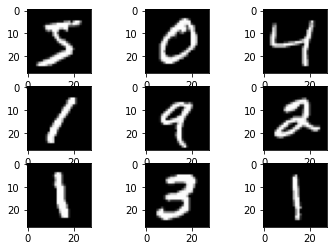

In [ ]:
for i in range(0,9):
  plt.subplot(3, 3, i + 1)
  plt.imshow(train_images[i], cmap=plt.get_cmap('gray'))

We prepare the data: Add an extra column for the pixel values and normalize data
(we have values from 0-255)

In [ ]:
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

train_labels = keras.utils.to_categorical(train_labels, 10)
test_labels = keras.utils.to_categorical(test_labels, 10)

train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

train_images /= 255
test_images /= 255


We define a CNN model. Activation = relu for conv layers and softmax for output layer

In [ ]:
def create_model_cnn():
  model = models.Sequential()
  model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(28, 28, 1)))
  model.add(layers.Conv2D(64, (3,3), activation='relu'))
  model.add(layers.MaxPool2D((2,2)))
  model.add(layers.Dropout(0.25))
 
  model.add(layers.Flatten())
 
  model.add(layers.Dense(256, activation='relu'))
  model.add(layers.Dropout(0.5))
  model.add(layers.Dense(10, activation='softmax'))  
 
  return model



We create the previously defined CNN model and get a summary

In [ ]:
model = create_model_cnn()
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               2359552   
_________________________________________________________________
dropout_5 (Dropout)          (None, 256)              

Compile the model with the optimizer, loss function and metrics:

In [ ]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])

We train the model

In [ ]:
historic = model.fit(train_images, train_labels, epochs = 10, verbose=1, validation_data=(test_images,test_labels))

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2962 - accuracy: 0.9051 - val_loss: 0.0437 - val_accuracy: 0.9855
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0637 - accuracy: 0.9798 - val_loss: 0.0354 - val_accuracy: 0.9887
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0408 - accuracy: 0.9864 - val_loss: 0.0272 - val_accuracy: 0.9916
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0341 - accuracy: 0.9891 - val_loss: 0.0331 - val_accuracy: 0.9897
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0306 - accuracy: 0.9905 - val_loss: 0.0343 - val_accuracy: 0.9903
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0258 - accuracy: 0.9908 - val_loss: 0.0289 - val_accuracy: 0.9916
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0225 - accuracy: 0.9931 - val_loss: 0.0265 - val_accuracy:

In [ ]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.0301 - accuracy: 0.9929


[0.03007577173411846, 0.992900013923645]

We save our model

In [ ]:
model.save("MNIST.h5")

Plot training/test loss + accuracy

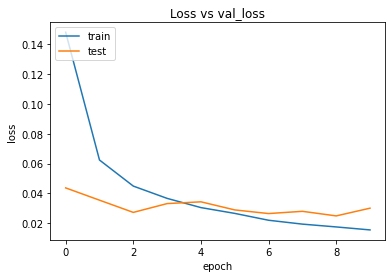

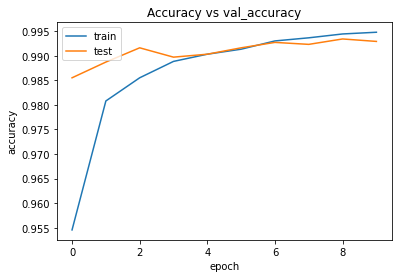

In [ ]:
plt.title("Loss vs val_loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.plot(historic.history["loss"])
plt.plot(historic.history["val_loss"])
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.title("Accuracy vs val_accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.plot(historic.history["accuracy"])
plt.plot(historic.history["val_accuracy"])
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Function to make a predict given a picture of a handwritten digit

In [ ]:
def predict_digit(img):
    #resize image to 28x28 pixels
    img = img.resize((28,28))
    #convert rgb to grayscale
    img = img.convert('L')
    img = np.array(img)
    #reshaping to support our model input and normalizing
    img = img.reshape(1,28,28,1)
    img = img/255.0
    #predicting the class
    res = model.predict(img)[0]
    return np.argmax(res), max(res)

We try to predict onto custom input

In [ ]:
f = Image.open("ceroMNIST.png")
print(predict_digit(f))

f = Image.open("uno.png")
print(predict_digit(f))

f = Image.open("dos.png")
print(predict_digit(f))

f = Image.open("tres.png")
print(predict_digit(f))

f = Image.open("cuatro.png")
print(predict_digit(f))

f = Image.open("cinco.png")
print(predict_digit(f))

f = Image.open("seisMNIST.png")
print(predict_digit(f))

f = Image.open("siete.png")
print(predict_digit(f))

f = Image.open("ocho.png")
print(predict_digit(f))

f = Image.open("nueve.png")
print(predict_digit(f))

(0, 0.9999666)
(4, 0.52275974)
(3, 0.7666941)
(1, 0.35840866)
(1, 0.49305198)
(3, 0.57372665)
(6, 0.9999926)
(3, 0.5219665)
(9, 0.65566003)
(1, 0.73623043)
